# Diabetes Prediction

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("C:\\Users\\admin\\Downloads\\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,250.0,33.6,0.627,50,1
1,1,85,66,29,300.0,26.6,0.351,31,0
2,8,183,64,0,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   766 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [9]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               766 non-null    int64  
 1   Glucose                   766 non-null    int64  
 2   BloodPressure             766 non-null    int64  
 3   SkinThickness             766 non-null    int64  
 4   Insulin                   766 non-null    float64
 5   BMI                       766 non-null    float64
 6   DiabetesPedigreeFunction  766 non-null    float64
 7   Age                       766 non-null    int64  
 8   Outcome                   766 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 59.8 KB


In [11]:
df.shape

(766, 9)

In [14]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [16]:
df.Outcome.value_counts()

0    499
1    267
Name: Outcome, dtype: int64

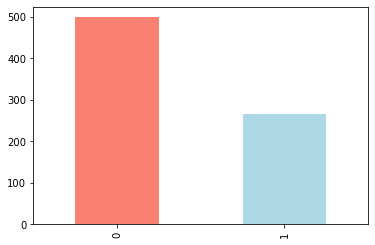

In [18]:
# ploting the value count with graph
df.Outcome.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,3.838120,120.819843,69.105744,20.590078,81.248042,32.012272,0.471969,33.246736,0.348564
std,3.370368,31.934965,19.379405,15.938414,116.221576,7.884790,0.331538,11.774924,0.476827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.325000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,130.000000,36.600000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
# Comparing Outcome column with Age column
df.Age.value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    20
37    19
42    18
33    17
38    16
36    16
32    15
45    15
34    14
40    13
46    13
43    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

In [28]:
cross = pd.crosstab(df.Outcome, df.Age)
cross

Age,21,22,23,24,25,26,27,28,29,30,...,63,64,65,66,67,68,69,70,72,81
Outcome,,,,,,,,,,,,,,,,,,,,,
0,58,61,31,38,34,25,24,25,16,14,...,4,1,3,2,2,1,2,0,1,1
1,5,11,7,8,14,8,8,10,13,6,...,0,0,0,2,1,0,0,1,0,0


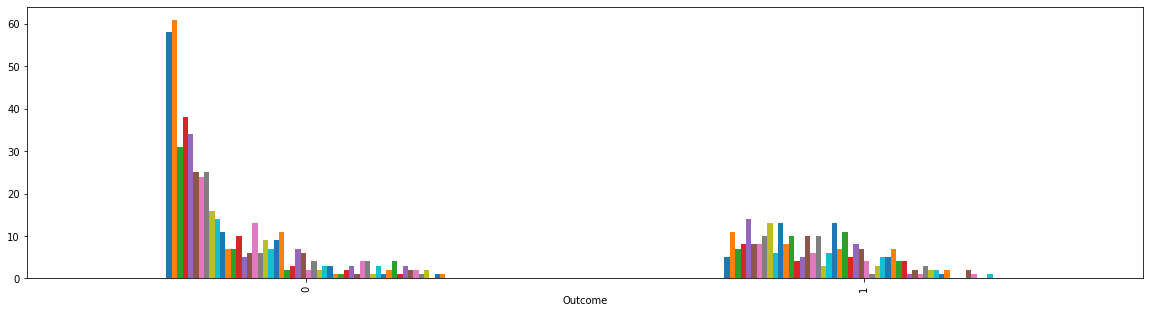

In [42]:
# plot
cross.plot(kind="bar",legend=False,figsize=(20,5));

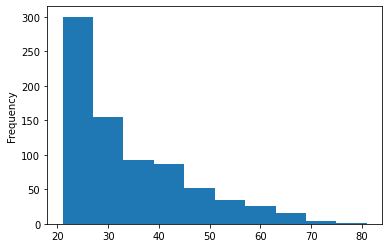

In [50]:
# checking the distribution of a variable
df.Age.plot.hist();

In [52]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126850,0.141757,-0.079277,-0.064484,0.019869,-0.034187,0.545250,0.220610
Glucose,0.126850,1.000000,0.153703,0.060621,0.329218,0.224539,0.136074,0.264399,0.464855
BloodPressure,0.141757,0.153703,1.000000,0.207821,0.072135,0.282063,0.041774,0.239617,0.065888
SkinThickness,-0.079277,0.060621,0.207821,1.000000,0.430809,0.390678,0.184091,-0.114867,0.076102
Insulin,-0.064484,0.329218,0.072135,0.430809,1.000000,0.195096,0.179183,-0.040474,0.128478
BMI,0.019869,0.224539,0.282063,0.390678,0.195096,1.000000,0.140918,0.035844,0.294707
DiabetesPedigreeFunction,-0.034187,0.136074,0.041774,0.184091,0.179183,0.140918,1.000000,0.033375,0.172375
Age,0.545250,0.264399,0.239617,-0.114867,-0.040474,0.035844,0.033375,1.000000,0.238668
Outcome,0.220610,0.464855,0.065888,0.076102,0.128478,0.294707,0.172375,0.238668,1.000000


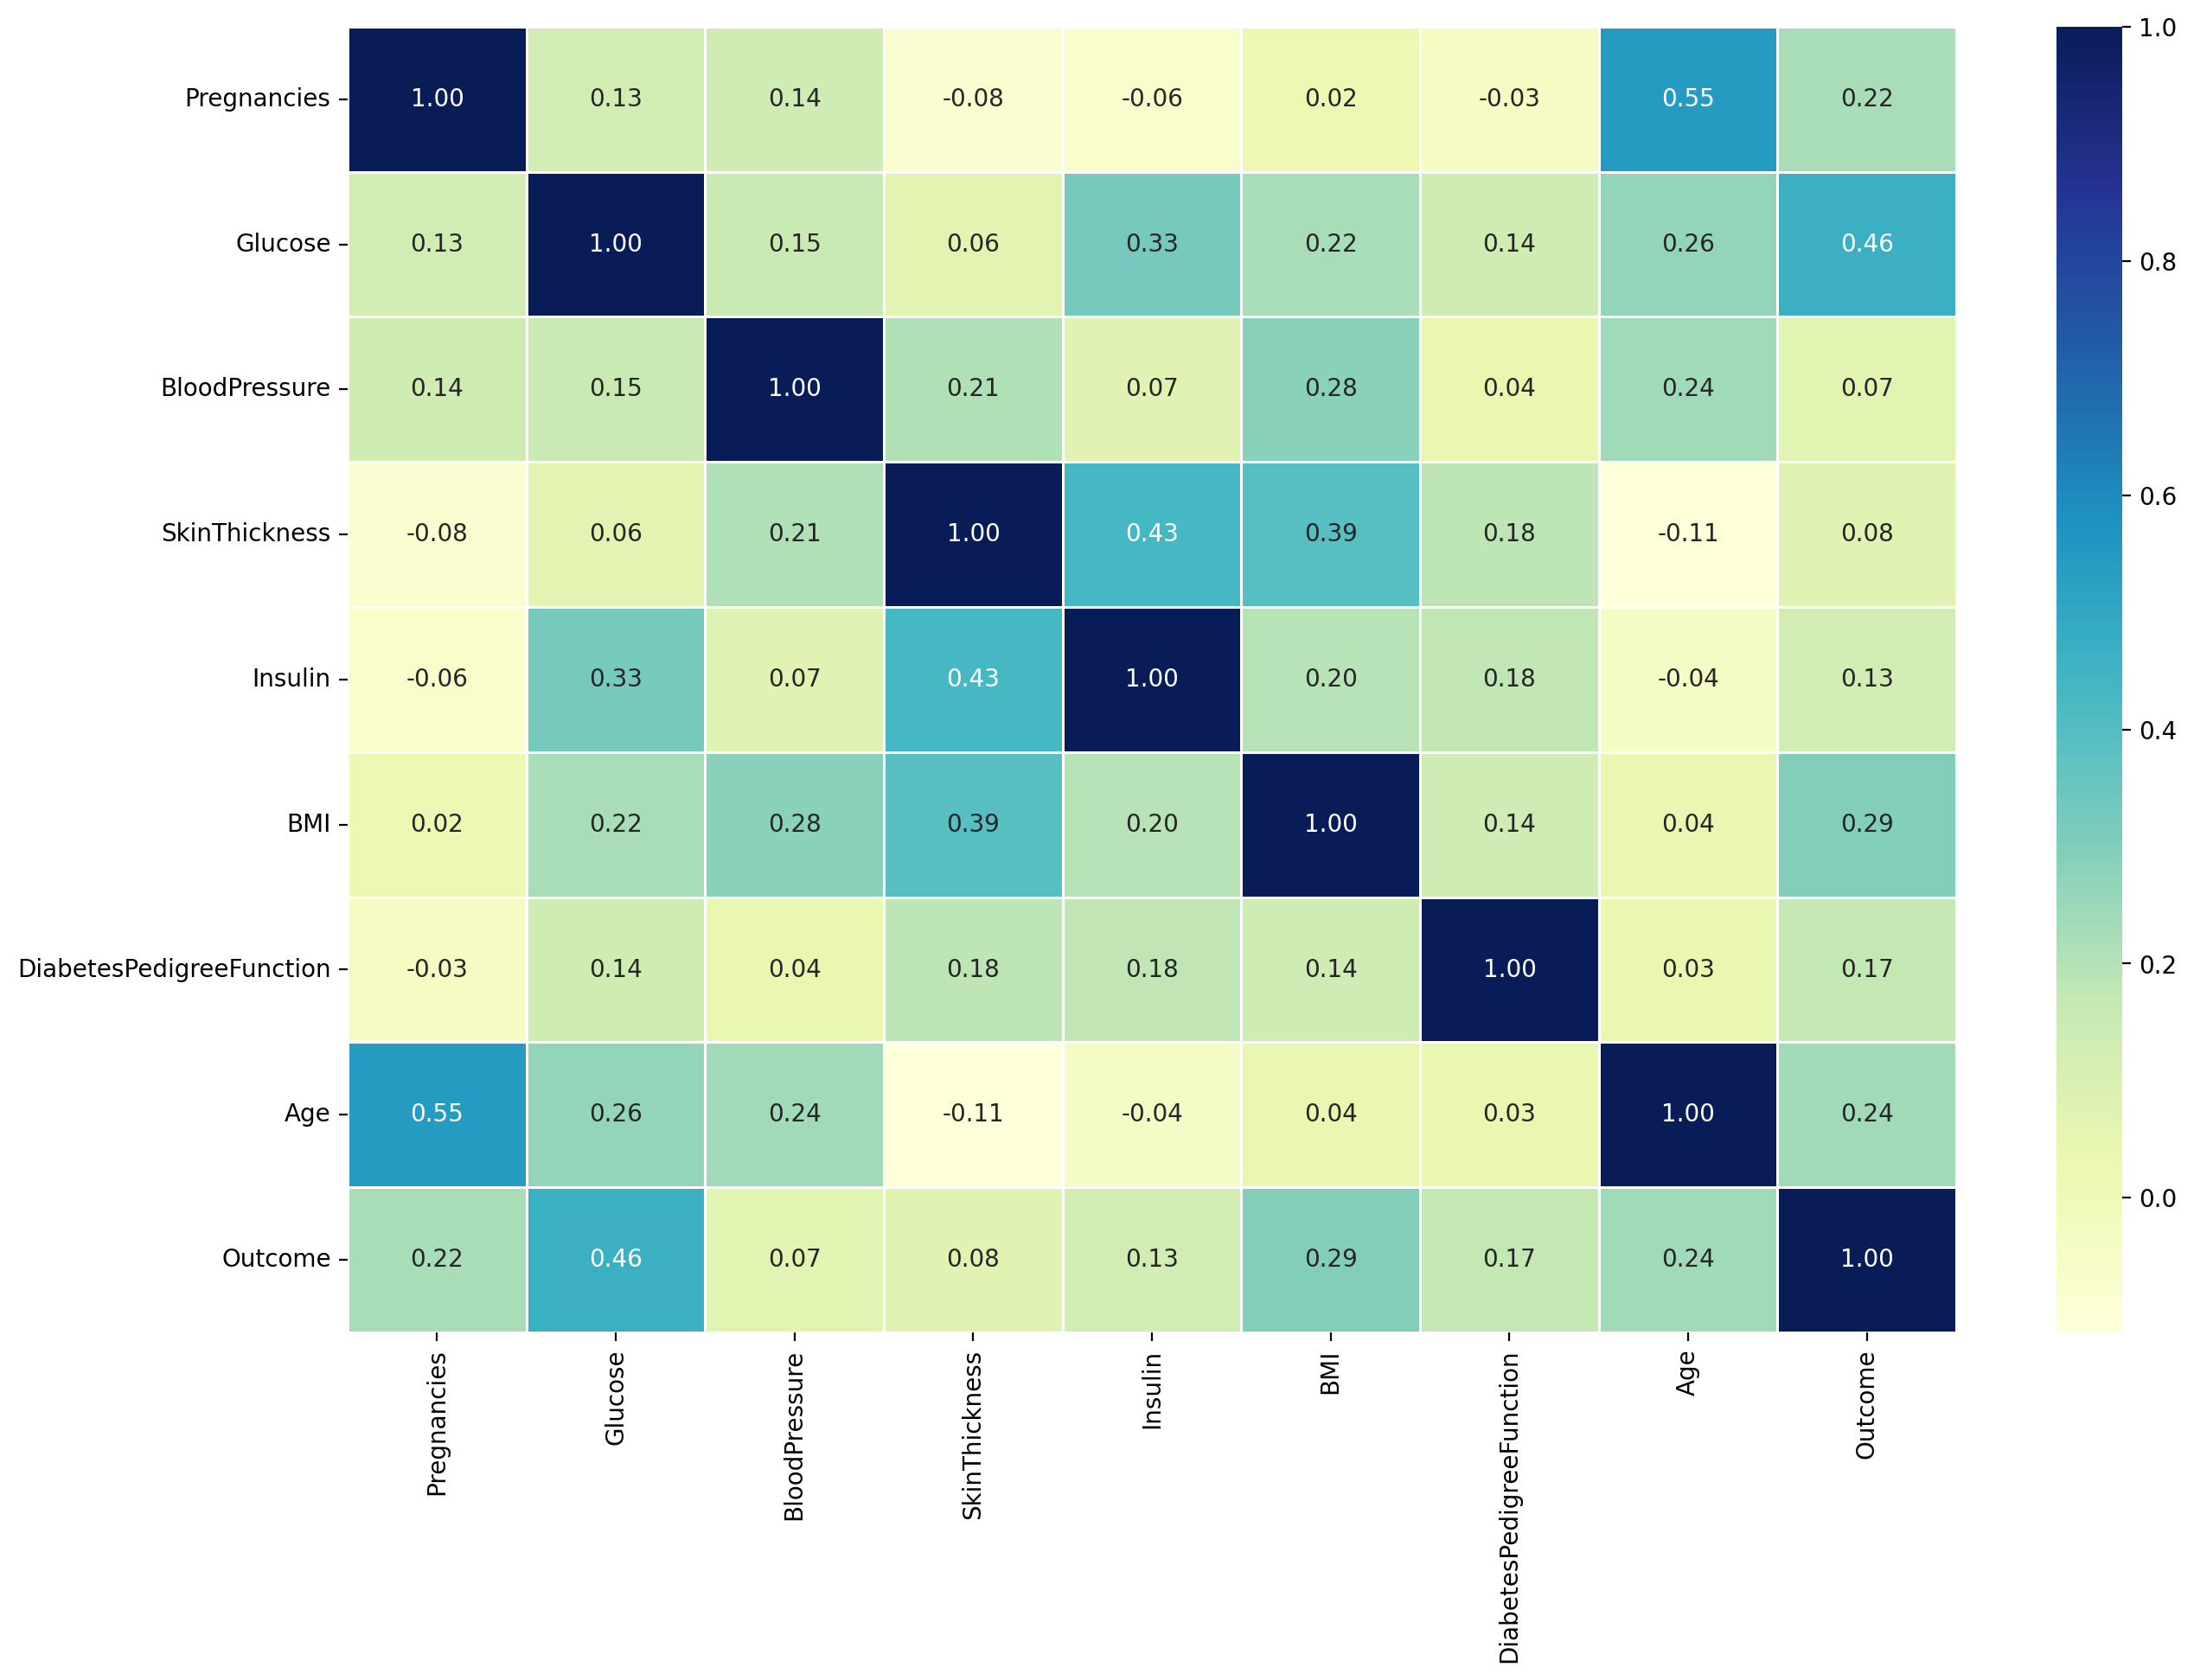

In [55]:
# heatmap
corr_matrix = df.corr()
plt.figure(figsize=(15, 10),dpi=200)
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

 # Modeling

In [57]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,250.0,33.6,0.627,50,1
1,1,85,66,29,300.0,26.6,0.351,31,0
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
6,3,78,50,32,88.0,31.0,0.248,26,1


In [66]:
# we will divide feature varibel and target varibel
x = df.drop("Outcome", axis=1)
y = df.Outcome

In [64]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,250.0,33.6,0.627,50
1,1,85,66,29,300.0,26.6,0.351,31
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
6,3,78,50,32,88.0,31.0,0.248,26


In [68]:
y.head()

0    1
1    0
3    0
4    1
6    1
Name: Outcome, dtype: int64

In [71]:
y.shape

(766,)

In [73]:
from sklearn.model_selection import train_test_split

In [77]:
#Training and test split

np.random.seed(42)

# Split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [79]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
346,1,139,46,19,83.0,28.7,0.654,22
441,2,83,66,23,50.0,32.2,0.497,22
236,7,181,84,21,192.0,35.9,0.586,51
340,1,130,70,13,105.0,25.9,0.472,22
313,3,113,50,10,85.0,29.5,0.626,25


In [81]:
y_train.head()

346    0
441    0
236    1
340    0
313    0
Name: Outcome, dtype: int64

In [84]:
len(y_train) , len(x_train) ,len(x_test) , len(y_test) 

(612, 612, 154, 154)

In [86]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
430,2,99,0,0,0.0,22.2,0.108,23
661,1,199,76,43,0.0,42.9,1.394,22
352,3,61,82,28,0.0,34.4,0.243,46
573,2,98,60,17,120.0,34.7,0.198,22
338,9,152,78,34,171.0,34.2,0.893,33


In [89]:
y_test.head()

430    0
661    1
352    0
573    0
338    1
Name: Outcome, dtype: int64

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [103]:
# we will deploy 3 model and will select the best one 
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=100), 
          "Random Forest": RandomForestClassifier(n_estimators=100)}

# Create function to fit models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores


In [104]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7337662337662337,
 'Logistic Regression': 0.8116883116883117,
 'Random Forest': 0.7857142857142857}

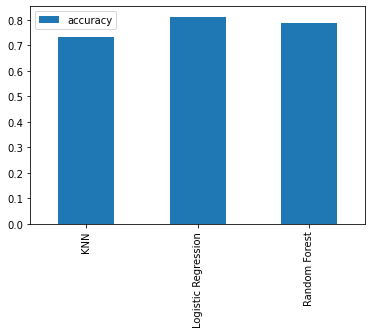

In [106]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

## Logistic regression is giving the highest accuracy when the hyperparameter are default

# Hyperparameter tuning

In [108]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [111]:
# list of train scores
train_scores = []

# list of test scores
test_scores = []

#list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(x_test, y_test))

In [113]:
train_scores

[1.0,
 0.8284313725490197,
 0.8496732026143791,
 0.8071895424836601,
 0.8006535947712419,
 0.7924836601307189,
 0.795751633986928,
 0.7859477124183006,
 0.7941176470588235,
 0.7843137254901961,
 0.7875816993464052,
 0.7892156862745098,
 0.7892156862745098,
 0.7810457516339869,
 0.7810457516339869,
 0.7843137254901961,
 0.7777777777777778,
 0.7761437908496732,
 0.795751633986928,
 0.7777777777777778]

Maximum KNN score on the test data: 78.57%


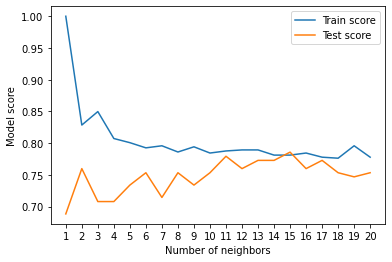

In [120]:
# plot will help us to select best parameter
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%");

In [122]:
# we use RandomizedSearchCV
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [124]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [127]:
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [130]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [132]:
rs_log_reg.score(x_test, y_test)

0.8116883116883117

In [133]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [134]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [135]:
rs_rf.score(X_test, y_test)

0.7987012987012987

In [137]:
# we will use GrideSearchcv
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [139]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [140]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8116883116883117

# Evaluating a classification model

In [142]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(x_test)

In [144]:
y_preds

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [145]:
y_test

430    0
661    1
352    0
573    0
338    1
      ..
344    0
246    0
348    0
62     0
638    1
Name: Outcome, Length: 154, dtype: int64

C:\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


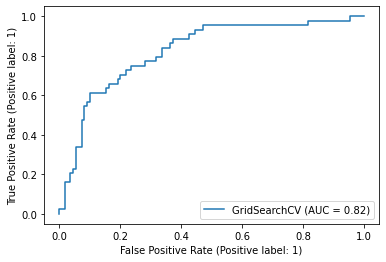

In [147]:
#  ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs_log_reg, X_test, y_test);

In [149]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[99 11]
 [18 26]]


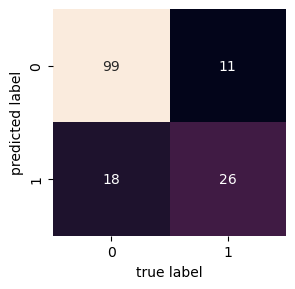

In [153]:
#sns.set(font_scale=1.5) 

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3),dpi=100)
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds);

In [156]:
# classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.70      0.59      0.64        44

    accuracy                           0.81       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



In [157]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [158]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [160]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy") # accuracy as scoring
cv_acc

array([0.76623377, 0.7254902 , 0.75163399, 0.79084967, 0.75163399])

In [162]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7571683218742041

In [164]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,x,y,cv=5,scoring="precision"))
cv_precision

0.7212592246463215

In [165]:
cv_recall = np.mean(cross_val_score(clf,x,y,cv=5,scoring="recall"))
cv_recall

0.4979734451432565

In [167]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,x,y,cv=5,scoring="f1"))
cv_f1

0.5874907544283984

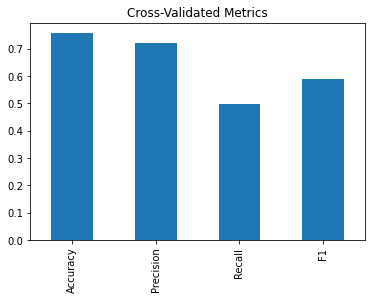

In [169]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [171]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(x_train, y_train);

In [173]:
clf.coef_

array([[ 8.25188506e-02,  2.01621366e-02, -1.95909740e-02,
        -6.54600388e-04, -2.44074163e-04,  2.94894236e-02,
         4.33378423e-01,  1.71790741e-03]])

In [175]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'Pregnancies': 0.08251885062473385,
 'Glucose': 0.020162136572577257,
 'BloodPressure': -0.019590974041455538,
 'SkinThickness': -0.0006546003879641733,
 'Insulin': -0.00024407416256422835,
 'BMI': 0.029489423629385524,
 'DiabetesPedigreeFunction': 0.4333784228808298,
 'Age': 0.0017179074097106507}

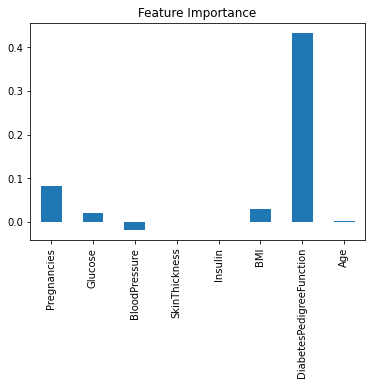

In [176]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [178]:
pd.crosstab(df["DiabetesPedigreeFunction"], df["Outcome"])

Outcome,0,1
DiabetesPedigreeFunction,,
0.078,1,0
0.084,1,0
0.085,2,0
0.088,1,1
0.089,1,0
...,...,...
1.893,0,1
2.137,0,1
2.288,0,1
